## Decision Trees
Decision trees are a machine learning method that splits data recursively based on feature values to make predictions, either for classification or regression

The dataset captures clinical and demographic information of patients to study the presence of heart disease. We will use it to identify factors associated with heart disease risk. We will first use a classification tree to classify the records as positive or negative for heart disease, before applying regression trees to predict a probability (risk of heart disease) of sorts. 

Now let us look at some of the features present in the dataset

- `'age'` - Age of the patient (in years)
- `'sex'` - Gender of the patient (0 = female, 1 = male)
- `'BP'` - Blood pressure measurement (mmHg)
- `'cholestrol'` - Serum cholesterol level (mg/dL)
- `'heart disease'` - Target variable indicating presence (1) or absence (0) of heart disease
- `'attack time'` - Time before an expected heart attack (in years)

In [1]:
import numpy as np; 
import pandas as pd; 
from matplotlib import pyplot as plt  # Data processing and visualisation
from sklearn.model_selection import train_test_split  # Train-test split
from sklearn import tree; from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree  # Decision tree models
from sklearn.model_selection import GridSearchCV, train_test_split  # Cross-validation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report  # Confusion matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, accuracy_score, mean_squared_error  # Error metrics

Tree depth: 3
Number of leaves: 8
📊 MODEL PERFORMANCE
Training Accuracy: 72.5%
Testing Accuracy:  70.4%
Gap (Train - Test): 2.1%
🟢 GOOD FIT!
→ Model generalizes well

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        45
           1       0.67      0.67      0.67        36

    accuracy                           0.70        81
   macro avg       0.70      0.70      0.70        81
weighted avg       0.70      0.70      0.70        81



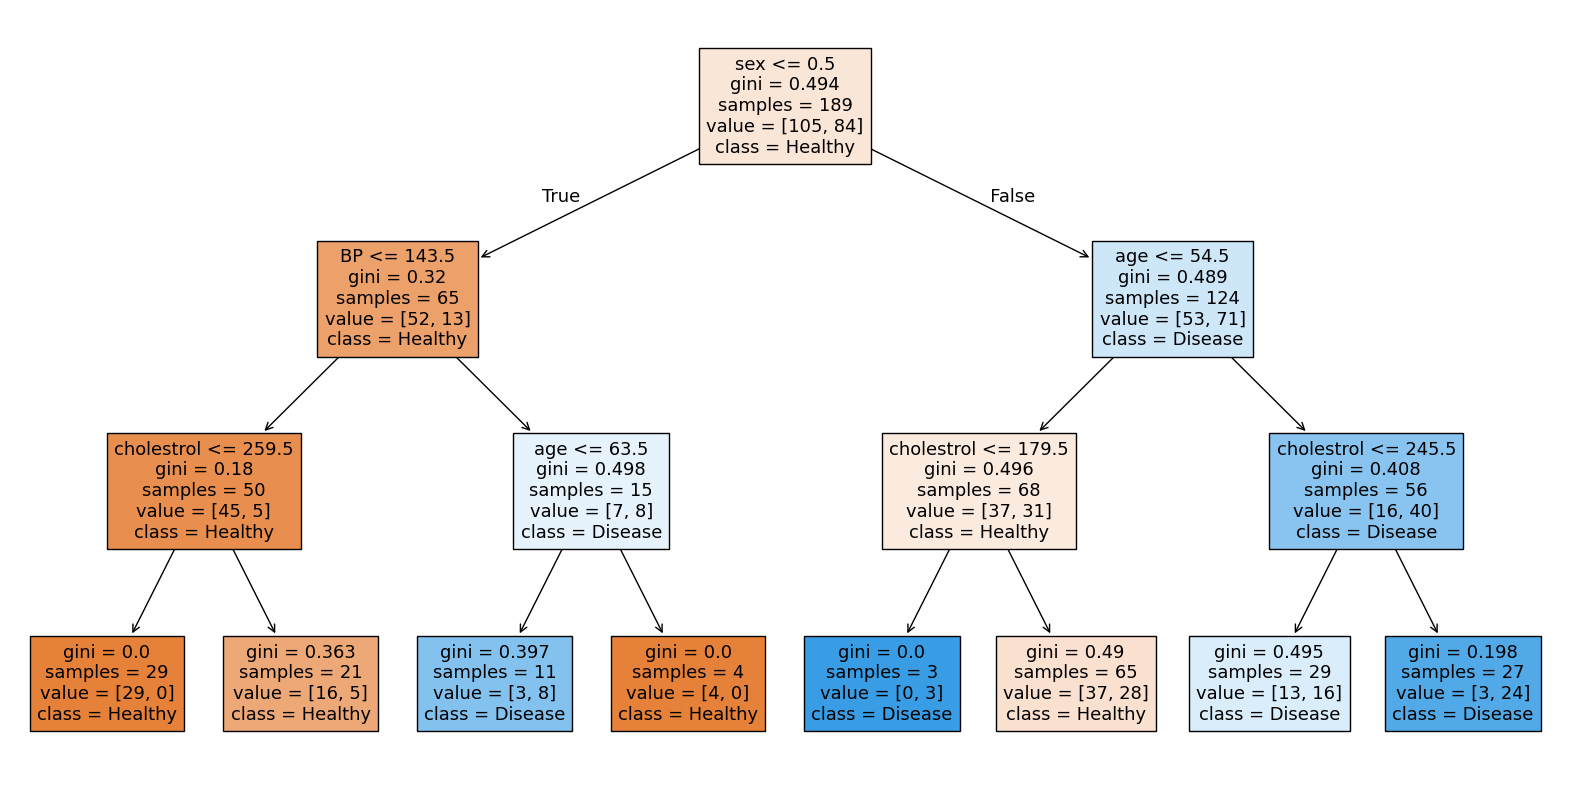

In [7]:
df = pd.read_csv('heart_disease_data.csv')
# print(df.head(10))
# print(f"Total samples: {len(df)}")
# print(f"Columns: {list(df.columns)}")
# print(df.dtypes)
# print(df.describe())
# print(df["heart disease"].value_counts())


X = df[["age", "sex", "BP", "cholestrol"]].values
y = df["heart disease"].values

# Split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify=y)

# print(f"Training: {len(X_train)}")
# print(f"Testing: {len(X_test)}")

# unique, counts = np.unique(y_train, return_counts=True)
# print(dict(zip(unique, counts)))


# unique, counts = np.unique(y_test, return_counts=True)
# print(dict(zip(unique, counts)))

model = DecisionTreeClassifier(
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

model.fit(X_train, y_train)

print(f"Tree depth: {model.get_depth()}")
print(f"Number of leaves: {model.get_n_leaves()}")

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# print("🔵 Training Predictions:")
# print("Predicted:", train_predictions)
# print("Actual:   ", y_train)

# print("\n🟢 Testing Predictions:")
# print("Predicted:", test_predictions)
# print("Actual:   ", y_test)

train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("=" * 50)
print("📊 MODEL PERFORMANCE")
print("=" * 50)
print(f"Training Accuracy: {train_accuracy * 100:.1f}%")
print(f"Testing Accuracy:  {test_accuracy * 100:.1f}%")
print(f"Gap (Train - Test): {(train_accuracy - test_accuracy) * 100:.1f}%")
print("=" * 50)

# Interpret results
gap = train_accuracy - test_accuracy
if gap > 0.10:
    print("🔴 OVERFITTING DETECTED!")
    print("→ Model memorized training data")
    print("→ Try: Reduce max_depth or increase min_samples")
elif gap > 0.05:
    print("🟡 SLIGHT OVERFITTING")
    print("→ Consider tuning hyperparameters")
elif train_accuracy < 0.70:
    print("🔵 UNDERFITTING")
    print("→ Model too simple")
    print("→ Try: Increase max_depth")
else:
    print("🟢 GOOD FIT!")
    print("→ Model generalizes well")

# 7. Detailed report
print("\n" + classification_report(y_test, test_predictions))

# 8. Visualize tree
plt.figure(figsize=(20, 10))
plot_tree(model, 
          feature_names=['age', 'sex', 'BP', 'cholestrol'],
          class_names=['Healthy', 'Disease'],
          filled=True)
plt.show()

In [2]:
# Data: [Age, Income]
data = [[25, 60], [45, 80], [22, 30], [35, 70], [19, 25]]
bought = [1, 1, 0, 1, 0] # 1=Yes, 0=No

tree = DecisionTreeClassifier()
tree.fit(data, bought)

predictions = tree.predict([[30, 75], [23, 40]])
print("Predictions:", predictions)  # Output: Predictions: [1 0]

Predictions: [1 0]


Predictions: [1 0]
Tree depth: 1
Number of leaves: 2


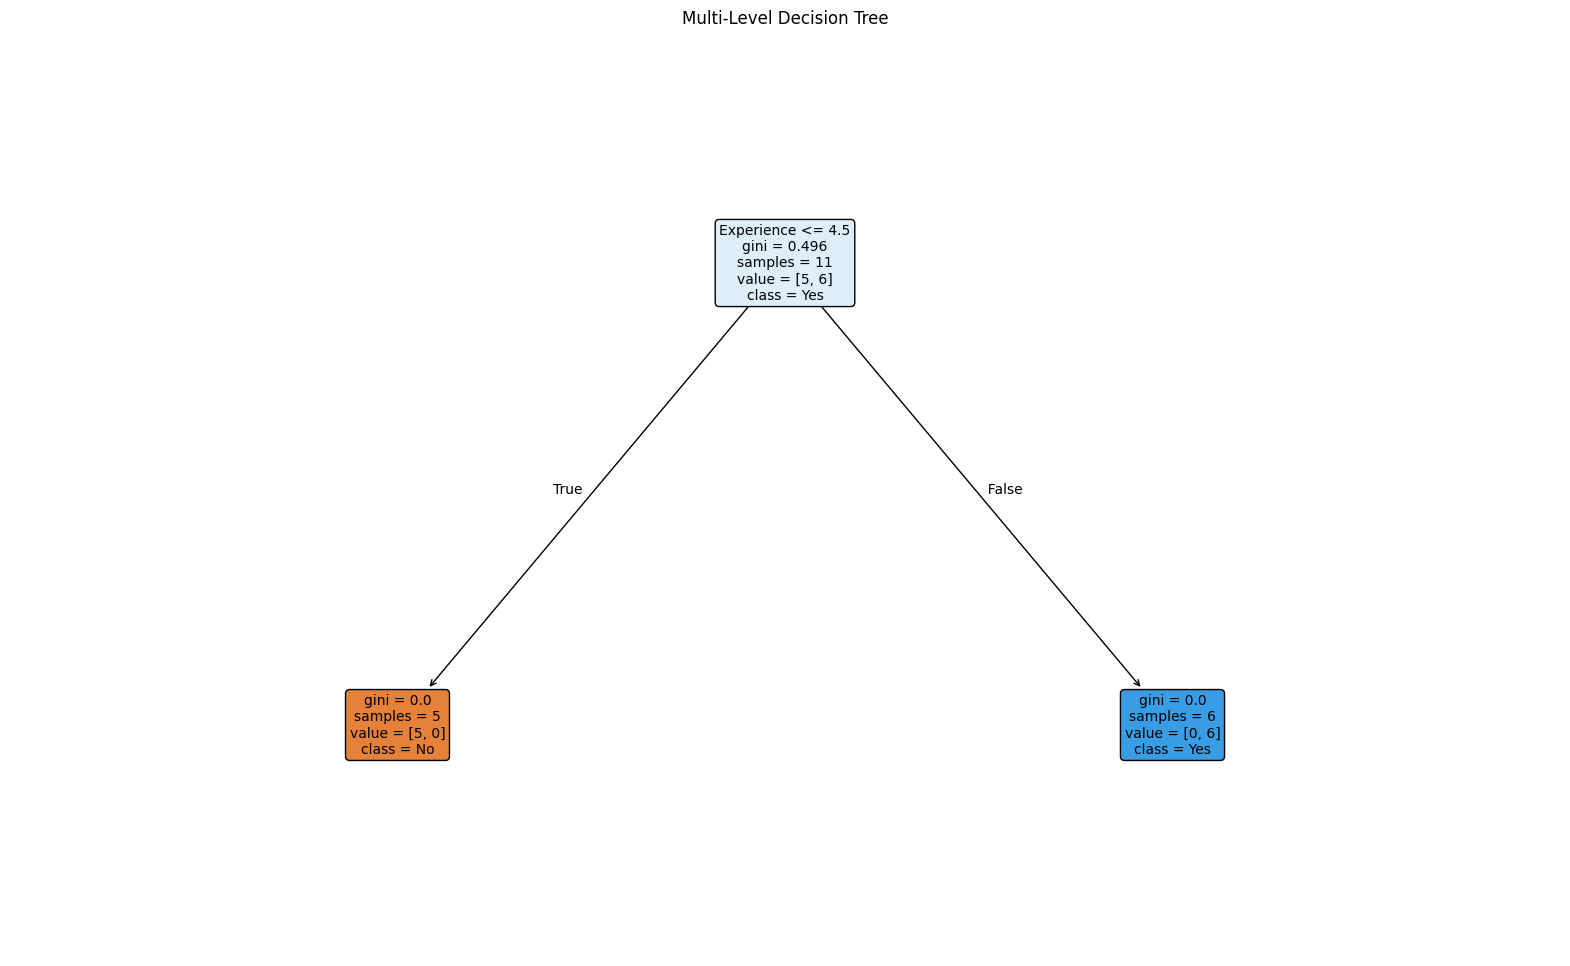


--- Tree Structure ---
Total nodes: 3


In [7]:
## Multilevel Decision Tree Example
# Data: [Age, Income, Years of Experience]

data = [
    [25, 60, 5],
    [45, 80, 20],
    [22, 30, 1],
    [35, 70, 10],
    [19, 25, 0],
    [28, 55, 3],
    [50, 90, 25],
]
bought = [1, 1, 0, 1, 0, 0, 1]  # 1=Yes, 0=No

# Feature names (for better visualization)
feature_names = ['Age', 'Income', 'Experience']

# Create and train the tree
tree = DecisionTreeClassifier()
tree.fit(data, bought)

# Make predictions
test_data = [
    [30, 65, 6],  # Should predict 1 (Buy)
    [27, 58, 2],  # Should predict 0 (Don't Buy)
]

predictions = tree.predict(test_data)
print("Predictions:", predictions)

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(
    tree, 
    feature_names=feature_names,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree Visualization")
plt.show()

# Check tree depth
print("Tree depth:", tree.get_depth())

# Check number of leaves (final nodes)
print("Number of leaves:", tree.get_n_leaves())

In [9]:
# Overfitting example with deeper tree
# Small training data
train_data = [
    [25, 60], [45, 80], [22, 30], 
    [35, 70], [19, 25], [28, 55]
]
train_labels = [1, 1, 0, 1, 0, 0]

test_data = [
    [27, 62],  # Similar to [25, 60] which bought
    [23, 32],  # Similar to [22, 30] which didn't buy
]
test_labels = [1, 0]

# --- OVERFITTED TREE (no limits) ---
tree_bad = DecisionTreeClassifier(max_depth=None)
tree_bad.fit(train_data, train_labels)

# --- GOOD TREE (max depth = 2) ---
tree_good = DecisionTreeClassifier(max_depth=2)
tree_good.fit(train_data, train_labels)

pred_bad = tree_bad.predict(test_data)
pred_good = tree_good.predict(test_data)

print("Expected:", test_labels)
print("Overfitted Tree Predicted:", pred_bad)
print("Good Tree Predicted:", pred_good)

Expected: [1, 0]
Overfitted Tree Predicted: [1 0]
Good Tree Predicted: [1 0]


In [2]:
# Load and view the data
df = pd.read_csv('heart_disease_data.csv'); df.head()

,Unnamed: 0,age,sex,BP,cholestrol,heart disease,attack time
0,0,70,1,130,322,1,2
1,1,67,0,115,564,0,2
2,2,57,1,124,261,1,4
3,3,64,1,128,263,0,4
4,4,74,0,120,269,0,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     270 non-null    int64
 1   age            270 non-null    int64
 2   sex            270 non-null    int64
 3   BP             270 non-null    int64
 4   cholestrol     270 non-null    int64
 5   heart disease  270 non-null    int64
 6   attack time    270 non-null    int64
dtypes: int64(7)
memory usage: 14.9 KB


Before training the decision tree, let's ensure that categorical variables are correctly represented
- `sex` is a categorical feature and should be converted to a categorical type so the tree can handle splits appropriately
- `heart disease` is numerical, so converting it to categorical can clarify that it represents distinct classes for classification tasks

In [4]:
df['sex'] = df['sex'].astype('category')
df['heart disease'] = df['heart disease'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Unnamed: 0     270 non-null    int64   
 1   age            270 non-null    int64   
 2   sex            270 non-null    category
 3   BP             270 non-null    int64   
 4   cholestrol     270 non-null    int64   
 5   heart disease  270 non-null    category
 6   attack time    270 non-null    int64   
dtypes: category(2), int64(5)
memory usage: 11.4 KB


Note that standardisation of variables is not necessary for trees. So, we proceed to splitting the data into input/output and training/testing sets.

In [5]:
X = df.drop(['heart disease', 'attack time'], axis = 1)  # Predictors
y = df['heart disease']  # Target

In [6]:
X.head()

,Unnamed: 0,age,sex,BP,cholestrol
0,0,70,1,130,322
1,1,67,0,115,564
2,2,57,1,124,261
3,3,64,1,128,263
4,4,74,0,120,269


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: category
Categories (2, int64): [0, 1]

In [8]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((189, 5), (81, 5), (189,), (81,))

### Classification using decision trees
Our goal is to classify `heart disease` using all available information, using a classification tree

In [9]:
# Train a decision tree using the training dataset
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


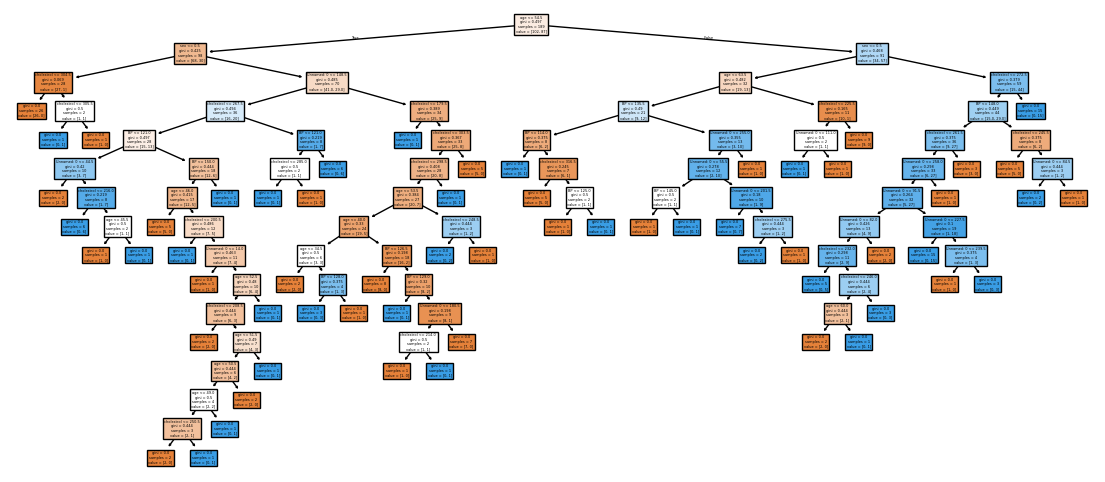

In [10]:
# Visualise the decision tree
fig = plt.figure(figsize = (14, 6))
fig = tree.plot_tree(dt, feature_names = X.columns, filled = True)

In [11]:
# Print the number of leaves and the depth of the tree
print('Number of leaves =', dt.get_n_leaves())
print('Tree depth =', dt.get_depth())

Number of leaves = 61
Tree depth = 15


The number of leaves and the depth of the tree is quite high. Actually, this tree is overfit on purpose! Let's confirm this by looking at the confusion matrices and by comparing the accuracy of the tree for both the training and testing data.

In [12]:
# Perform prediction on the training and testing datasets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

Text(0.5, 1.0, 'Testing')

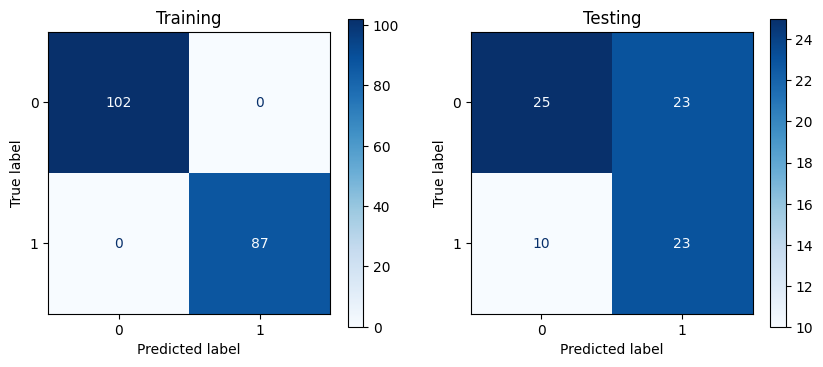

In [13]:
# Print the confusion matrices for the training and testing data
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
ConfusionMatrixDisplay.from_estimator(dt, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Testing')

In [14]:
# Print the accuracy scores
print(f'Accuracy score on the training dataset: {round(accuracy_score(y_train_pred, y_train), 3)}')
print(f'Accuracy score on the testing dataset: {round(accuracy_score(y_test_pred, y_test), 3)}')

Accuracy score on the training dataset: 1.0
Accuracy score on the testing dataset: 0.593


The accuracy score is much higher on the training dataset than on the testing dataset. That is, the model performs much better on the training dataset than on the testing dataset, confirming that the model is overfitting. 


### Pruning the tree using the maximum tree depth
We will try to prune the tree for max depth using cross-validation to evaluate performance

In [15]:
# Using max_depth to control overfitting
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


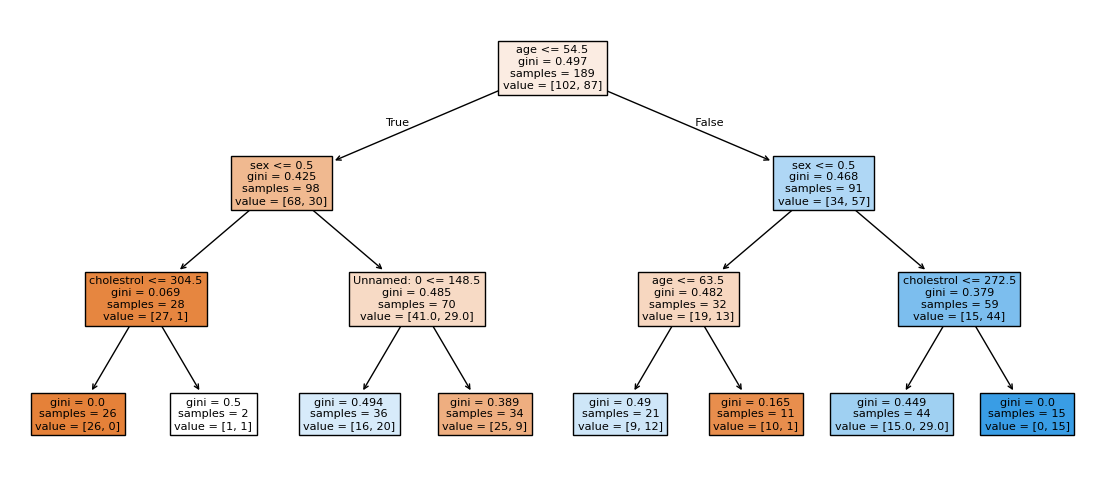

In [16]:
fig = plt.figure(figsize = (14, 6))
fig = tree.plot_tree(dt, feature_names = X.columns, filled = True)

We see a much smaller tree now. But is this depth the most optimal? While simpler to code, the results are often not as good. In the image, we see that the impurities are high for many leaves. We will implement this approach using the `GridSearchCV()` method, varying the `max_depth` parameter.

In [17]:
# Create a DecisionTreeClassifier object
tree_clf = DecisionTreeClassifier(random_state = 0)

# Define the range of the max_depth parameter
param_grid = {'max_depth': np.arange(1, 11)} # Parameter range

# Perform grid search
grid = GridSearchCV(tree_clf, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)
grid_search = grid.fit(X_train, y_train)

# Print the optimal value of max_depth
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The optimal value of max_depth is 2


Let's retrain the tree with the optimal max depth on the training data

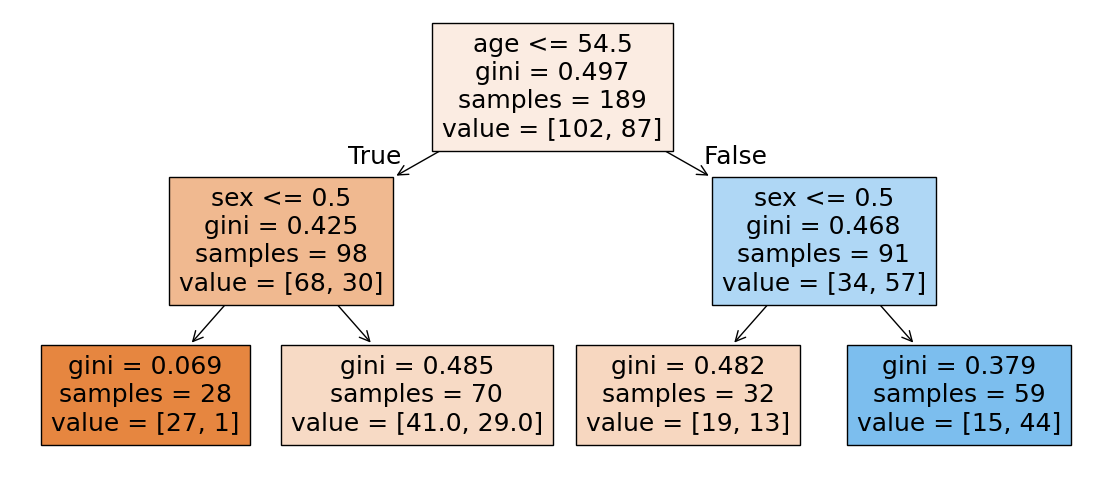

In [18]:
# Train a tree using the optimal max_depth
best_tree_clf = DecisionTreeClassifier(random_state = 0, max_depth = grid_search.best_params_['max_depth'])
best_tree_clf = best_tree_clf.fit(X_train, y_train)

# Visualise the decision tree
fig = plt.figure(figsize = (14, 6))
fig = tree.plot_tree(best_tree_clf, feature_names = X.columns, filled = True)

In [19]:
# Print the number of leaves and the depth of the tree
print('Number of leaves =', best_tree_clf.get_n_leaves())
print('Tree depth =', best_tree_clf.get_depth())

Number of leaves = 4
Tree depth = 2


We will also output its confusion matrix for the training and the testing datasets, its accuracy on the two datasets, and various other performance measures

In [20]:
# Perform prediction on the training and testing datasets
y_train_pred = best_tree_clf.predict(X_train)
y_test_pred = best_tree_clf.predict(X_test)

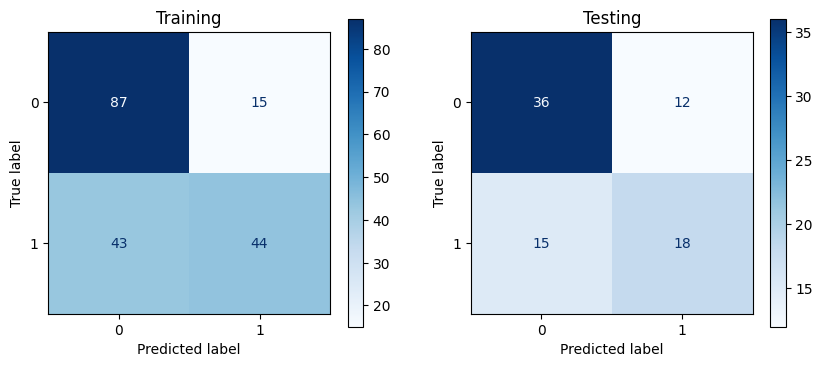

In [21]:
# Print the confusion matrices for the training and testing data
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
ConfusionMatrixDisplay.from_estimator(best_tree_clf, X_train, y_train, cmap = plt.cm.Blues, ax = ax[0])
ConfusionMatrixDisplay.from_estimator(best_tree_clf, X_test, y_test, cmap = plt.cm.Blues, ax = ax[1])
ax[0].set_title('Training')
ax[1].set_title('Testing');

In [22]:
# Print the accuracy scores
print(f'Accuracy score on the training dataset: {round(accuracy_score(y_train_pred, y_train), 3)}')
print(f'Accuracy score on the testing dataset: {round(accuracy_score(y_test_pred, y_test), 3)}')

Accuracy score on the training dataset: 0.693
Accuracy score on the testing dataset: 0.667


Now, the overfitting seems to have improved

In [23]:
# More performance metrics on the testing data
print('Performance measures on the testing set\n')
print('Accuracy Score: %.3f' % accuracy_score(y_test, y_test_pred))
print('Sensitivity (recall of positive class): %.3f' % recall_score(y_test, y_test_pred, pos_label = 1))
print('Specificty (recall of negative class): %.3f' % recall_score(y_test, y_test_pred, pos_label = 0))
print('F1 Score: %.3f' % f1_score(y_test, y_test_pred))

Performance measures on the testing set

Accuracy Score: 0.667
Sensitivity (recall of positive class): 0.545
Specificty (recall of negative class): 0.750
F1 Score: 0.571


We can tune for multiple hyperparameters using cross-validation as well

In [24]:
# Create a DecisionTreeClassifier object
tree_clf = DecisionTreeClassifier(random_state = 0)

# Define the range of hyperparameters
param_grid = {'max_depth': np.arange(1, 11), 'min_samples_split': np.arange(5, 16)}

# Perform grid search
grid = GridSearchCV(tree_clf, param_grid, cv = 5, scoring = 'accuracy', return_train_score = False, verbose = 1)
grid_search = grid.fit(X_train, y_train)

# Print the optimal values
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])
print('The optimal value of min_samples_split is', grid_search.best_params_['min_samples_split'])

Fitting 5 folds for each of 110 candidates, totalling 550 fits
The optimal value of max_depth is 4
The optimal value of min_samples_split is 15


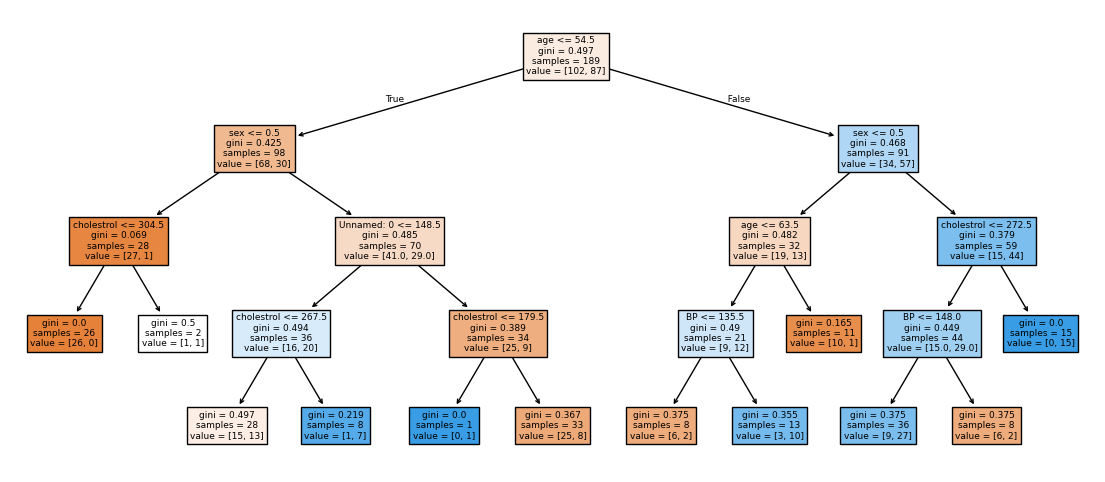

In [25]:
# Train and visualise the optimum tree
best_tree_clf = DecisionTreeClassifier(random_state = 0,
                                       max_depth = grid_search.best_params_['max_depth'],
                                       min_samples_split = grid_search.best_params_['min_samples_split'])
best_tree_clf = best_tree_clf.fit(X_train, y_train)
fig = plt.figure(figsize = (14, 6))
fig = tree.plot_tree(best_tree_clf, feature_names = X.columns, filled = True)

In [26]:
# Training and testing accuracy scores
y_train_pred = best_tree_clf.predict(X_train)
y_test_pred = best_tree_clf.predict(X_test)
print(f'Accuracy score on the training dataset: {round(accuracy_score(y_train_pred, y_train), 3)}')
print(f'Accuracy score on the testing dataset: {round(accuracy_score(y_test_pred, y_test), 3)}')

Accuracy score on the training dataset: 0.788
Accuracy score on the testing dataset: 0.667


The model seems to have improved further

### Regression Trees
For regression, we will consider the `'attack time'` variable as the target to predict

In [27]:
X = df.drop(['heart disease', 'attack time'], axis = 1)  # Predictors
y = df['attack time']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

In [28]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 189 entries, 97 to 172
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  189 non-null    int64   
 1   age         189 non-null    int64   
 2   sex         189 non-null    category
 3   BP          189 non-null    int64   
 4   cholestrol  189 non-null    int64   
dtypes: category(1), int64(4)
memory usage: 7.7 KB


In [29]:
(y_train)

97      3
217     8
232    12
250     4
21      9
       ..
251    13
192    12
117     2
47      4
172     2
Name: attack time, Length: 189, dtype: int64

Now, we build the regression tree model

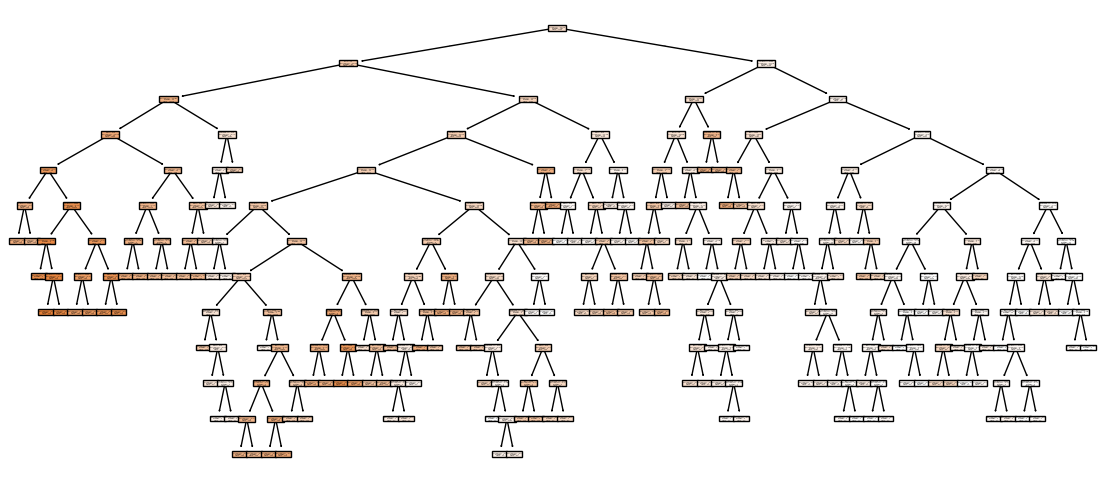

In [30]:
# Train and visualise the regression tree
tree_reg = DecisionTreeRegressor(random_state = 0)
tree_reg = tree_reg.fit(X_train, y_train)
fig = plt.figure(figsize = (14, 6))
fig = tree.plot_tree(tree_reg, feature_names = X.columns, filled = True)

Now, we will use crross-validation for finding the optimal hyperparameters

In [31]:
# Create a DecisionTreeRegressor object
best_tree_reg = DecisionTreeRegressor(random_state = 0)

# Define the range of the max_depth parameter
param_grid = {'max_depth': np.arange(1, 11)} # Parameter range

# Perform grid search
grid = GridSearchCV(tree_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = False, verbose = 1)
grid_search = grid.fit(X_train, y_train)

# Print the optimal value of max_depth
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The optimal value of max_depth is 3


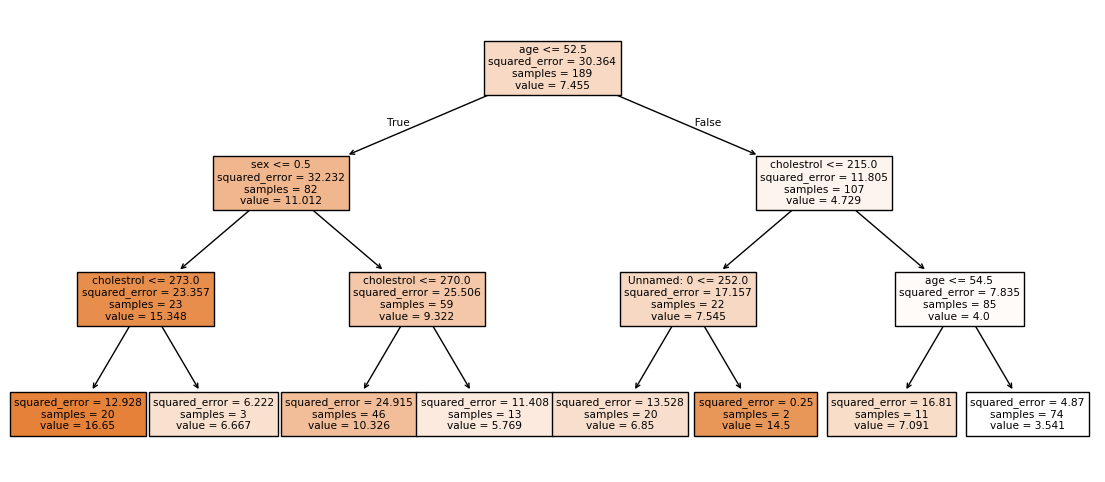

In [32]:
# Train a tree using the optimal max_depth
best_tree_reg = DecisionTreeRegressor(random_state = 0, max_depth = grid_search.best_params_['max_depth'])
best_tree_reg = best_tree_reg.fit(X_train, y_train)

# Visualise the decision tree
fig = plt.figure(figsize = (14, 6))
fig = tree.plot_tree(best_tree_reg, feature_names = X.columns, filled = True)

Let's evaluate the model

In [33]:
# Predict on training and testing sets
y_train_pred = best_tree_reg.predict(X_train)
y_test_pred = best_tree_reg.predict(X_test)

# Calculate RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE on training set: {train_rmse:.3f}")
print(f"RMSE on testing set: {test_rmse:.3f}")

RMSE on training set: 3.555
RMSE on testing set: 4.573


We can tune for multiple hyperparameters as well

In [34]:
# Create a DecisionTreeRegressor object
tree_clf = DecisionTreeRegressor(random_state = 0)

# Define the range of hyperparameters
param_grid = {'max_depth': np.arange(1, 11), 'min_samples_split': np.arange(5, 16)}

# Perform grid search
grid = GridSearchCV(tree_clf, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = False, verbose = 1)
grid_search = grid.fit(X_train, y_train)

# Print the optimal values
print('The optimal value of max_depth is', grid_search.best_params_['max_depth'])
print('The optimal value of min_samples_split is', grid_search.best_params_['min_samples_split'])

Fitting 5 folds for each of 110 candidates, totalling 550 fits
The optimal value of max_depth is 3
The optimal value of min_samples_split is 15


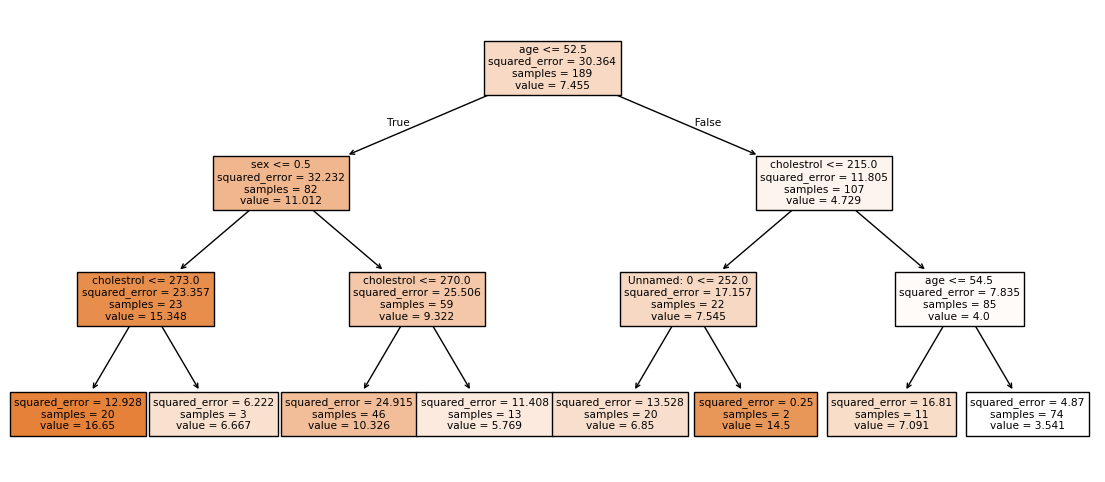

In [35]:
# Train and visualise the optimum tree
best_tree_clf = DecisionTreeRegressor(random_state = 0,
                                      max_depth = grid_search.best_params_['max_depth'],
                                      min_samples_split = grid_search.best_params_['min_samples_split'])
best_tree_clf = best_tree_clf.fit(X_train, y_train)
fig = plt.figure(figsize = (14, 6))
fig = tree.plot_tree(best_tree_clf, feature_names = X.columns, filled = True)

In [36]:
# Training and testing performance
y_train_pred = best_tree_reg.predict(X_train)
y_test_pred = best_tree_reg.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE on training set: {train_rmse:.3f}")
print(f"RMSE on testing set: {test_rmse:.3f}")

RMSE on training set: 3.555
RMSE on testing set: 4.573
